<h1>Intro to Computer Music, Lab06</h1>
<h2>Gus Xia, NYU Shanghai</h2>

In this lab you will:

1. learn how to generate "bitwise-operation music"
2. learn basic AM & FM synthesis techiques 

<h2> Load packages </h2>


In [1]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
%matplotlib inline 
from operator import add
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
from __future__ import print_function # use the print() function from Python3
import math
import vamp
from mdx import audio_to_midi_melodia as atom
import pretty_midi
print('hi')

hi


In [2]:
# This is the audio file we'll be analyzing. 
# You can download it here: http://labrosa.ee.columbia.edu/projects/melody/mirex05TrainFiles.zip
audio_file = "SHELOVE.mp3"

In [3]:
# This is how we load audio using Librosa
audio, sr = librosa.load(audio_file, sr=44100, mono=True)

In [4]:
data = vamp.collect(audio, sr, "mtg-melodia:melodia")

In [5]:
# vector is a tuple of two values: the hop size used for analysis and the array of pitch values
# Note that the hop size is *always* equal to 128/44100.0 = 2.9 ms
hop, melody = data['vector']
print(hop)
print(melody)

 0.002902494
[ 0.  0.  0. ...,  0.  0.  0.]


In [6]:
import numpy as np
timestamps = 8 * 128/44100.0 + np.arange(len(melody)) * (128/44100.0)

In [7]:
# parameter values are specified by providing a dicionary to the optional "parameters" parameter:
params = {"voicing": .2, "minpeaksalience": 0.0}

data = vamp.collect(audio, sr, "mtg-melodia:melodia", parameters=params)
hop, melody = data['vector']

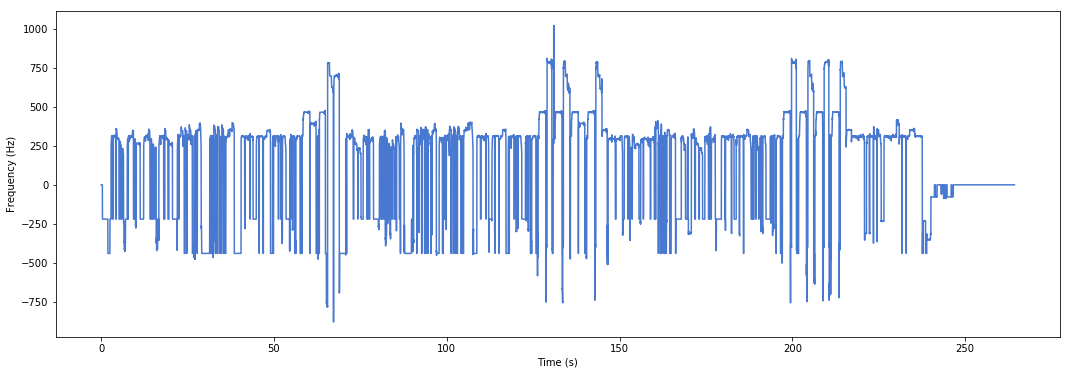

In [8]:
# Melodia returns unvoiced (=no melody) sections as negative values. So by default, we get:
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

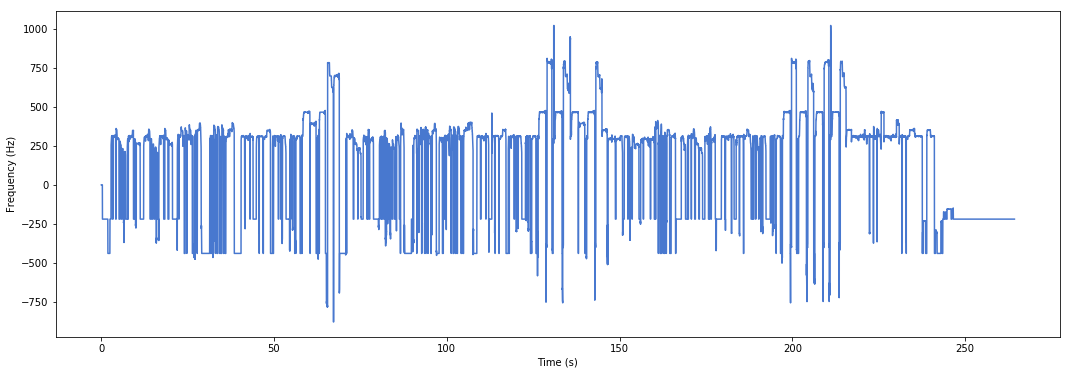

In [9]:
# parameter values are specified by providing a dicionary to the optional "parameters" parameter:
params = {"voicing": 1, "minpeaksalience": 0.0}

data = vamp.collect(audio, sr, "mtg-melodia:melodia", parameters=params)
hop, melody = data['vector']

# Melodia returns unvoiced (=no melody) sections as negative values. So by default, we get:
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

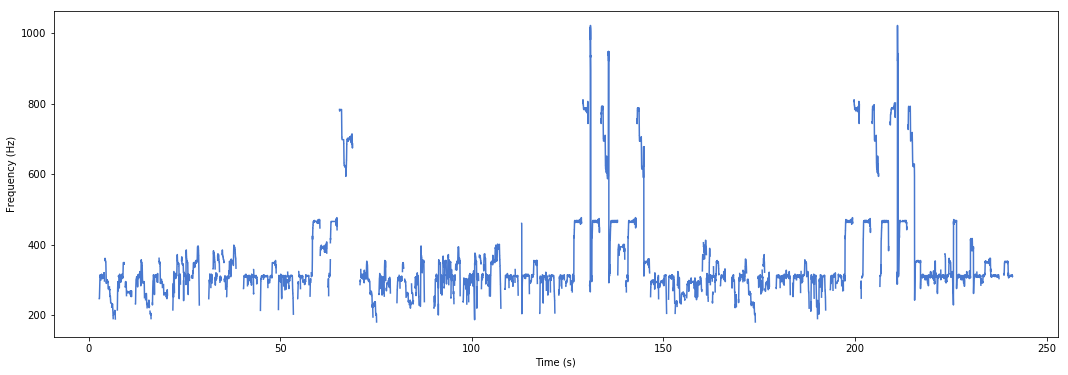

In [10]:
# A clearer option is to get rid of the negative values before plotting
melody_pos = melody[:]
melody_pos[melody<=0] = None
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_pos)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

/Users/robertonoel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """


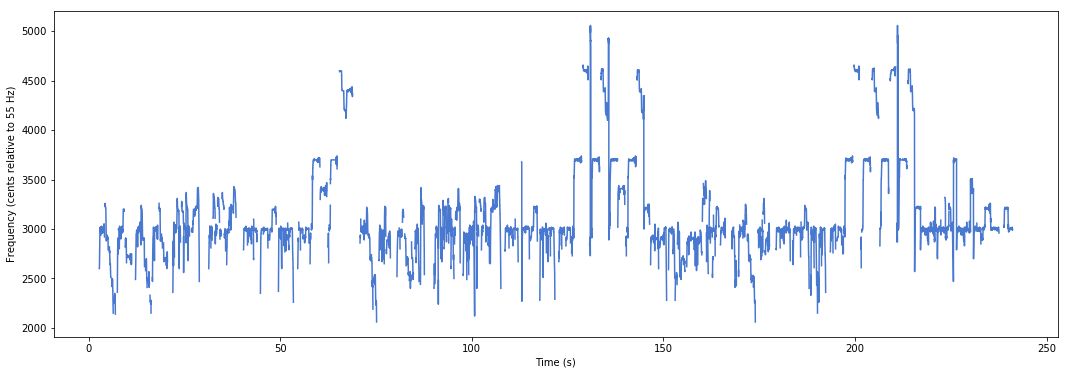

In [ ]:
# Finally, you might want to plot the pitch sequence in cents rather than in Hz. 
# This especially makes sense if you are comparing two or more pitch sequences 
# to each other (e.g. comparing an estimate against a reference).
melody_cents = 1200*np.log2(melody/55.0)
melody_cents[melody<=0] = None
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_cents)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (cents relative to 55 Hz)')
plt.show()

In [ ]:
notes = atom("SHELOVE.MP3","BESAME.mp3",200,.3,.2)

Loading audio...
Extracting melody f0 with MELODIA...


In [ ]:
import pretty_midi
# Create a PrettyMIDI object
music = pretty_midi.PrettyMIDI()
# Create an Instrument instance for a cello instrument
instrument = pretty_midi.Instrument(program=1)
# Iterate over note names, which will be converted to note number later
print(notes[0:10])
for i in range(len(notes)-1):
    notes[i][1] = notes[i+1][0]
#print(notes[0:10])
def matrix2notes(m):
    # first sort the matrix to make sure starting time is in order
    m = array(m)
    m = m[argsort(m[:,0]),:]
    # transfer the databack to note list
    notes=[pretty_midi.Note(start=m[i,0], end=m[i,1], pitch=int(m[i,2]), velocity= int(m[i,3]) ) 
                            for i in range(size(m,0))]
    return notes

instrument.notes = matrix2notes(notes)
#print(instrument.notes)
# Add the cello instrument to the PrettyMIDI object
music.instruments.append(instrument)
# Write out the MIDI data
#cello_music.write('cello-C-chord.mid')

In [ ]:
imshow(music.get_piano_roll(), aspect= 'auto')

In [ ]:
#[[start, stop, note, velocity]..]
#[[notes...],[beats...],[no]]
import pretty_midi
import random
Fc = 600
Fm = 2
Fa = 6
sr = 4410
index = 5
Trans = 7
Vel = 100

def musicIdea(val,instrumentNum, changer):
    if (val==3):
        wave = [((t*.05*changer**1.8*(t+(t>>3*changer)))%128/16) for t in range(455,466)]
        scale = wave
        beats = [[0,1/2,2/2,3/2,4/2,5/2,6/2,7/2,8/2,9/2,10/2,11/2],[.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,12]]
    if (val==2):
        note_matrix = fractal_music(0,4,5,40)
        m = array(note_matrix)
        m = m[argsort(m[:,0]),:]
        scale=[]
        beats=[[],[]]
        for i in m:
            scale.append(i[2])
            beats[0].append(int(((i[0])*10)//1))
            beats[1].append(int(((i[1])*10)//1))
    if(val==1):
        scale = [-2,0,2,3,5,7,9,10,-14,-12,-10,-9,-7,-5,-3,-2]
        beats = [[0,2,4,1.5,2,2.5,3,3.5,0,.5,1,1.5,2,2.5,2.5,2],[2,4,6,4,4,4,4,4,4,4,4,4,4,4,4,4]]
    if(val==0):
        scale = [0,3,7,3,7,10]
        beats = [[0,.1,.2,.3,.3,.3],[.3,.3,.3,1,2,3]]
    #beats = [[0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8]]
    vel=[]
    for i in range(len(scale)):
        vel.append(i*5+.05)
    #Matrix outline = [   [SCALE] ,[[beat start][beat end]], [vel] ]
    return [scale,beats,vel,instrumentNum]

def transform(matr, inst):
    scale = []
    beats = [[],[]]
    velo = []
    ins = [inst]
    for i in matr:
        scale.append(i[2])
        beats[0].append((i[0]))
        beats[1].append((i[1]))
        velo.append(i[3]) 
    return([scale, beats, velo, ins])
    
def pluck(freq, beat,vel,instrument):
    #print(freq)
    #print(instrument)
    #print(vel)
    if(instrument[0]==0):
        gmin =  [sin(2*pi*freq*n + (4*n) * .5*sin(2*pi*sin(10*n)*n))* exp(-2*n) for n in arange(0.,beat,1./4410)]
    if(instrument[0]==1):
        #print("HERE!!!!")
        gmin = [vel*cos(2*pi*freq*n + cos(2*pi*Fm*n)) * exp(-.1*n) for n in arange(0.,beat,1./4410)]
    if(instrument[0]==2):
        #print("HERE")
        gmin = [.75*vel*cos(2*pi*freq*n) * exp(-2*n) for n in arange(0.,beat,1./4410)]
    if(instrument[0]==3):
        gmin =  [vel*cos(2*pi*freq*n + exp(-4*n) * cos(2*pi*Fm*n)) * exp(-5*n) for n in arange(0.,beat,1./4410)]
    if(instrument[0]==4):
        gmin =  [.6*sin(2*pi*freq*n) * exp(-5*n) for n in arange(0.,beat,1./4410)]
    #print("LEN OF GMIN: "+str(len(gmin)))
    return gmin
def keyshift(x, shift):
    scale = x[0]
    newscale = []
    for y in scale:
        y = y-shift
        newscale.append(y)
    x[0] = newscale
    return x

def combine(x):
    matrixx=x
    #Seperate out matrix again for simplicity
    comb=[]
    beats=matrixx[1]
    scale=matrixx[0]
    vel=matrixx[2]
    ins=matrixx[3]
    
  
    comb = [0]*(sr*(math.ceil(max(beats[1]))))
    times = []
    
    dicHolder=[]
    for n in range(len(beats[0])):
         times.append((beats[1][n]*sr - beats[0][n]*sr)/sr)
         
    for n in range(len(scale)):
        returnArray=pluck(27*(2**(scale[n]/12)),times[n],vel[n],ins)
        thisdict =	{
              "startIndex": beats[0][n]*sr,
              "endIndex": beats[1][n]*sr,
              "waveArray": returnArray
            }
        dicHolder.append(thisdict)
        #print("startIndex: "+str(thisdict.get("startIndex")))
        #print("EndIndex: "+str(thisdict.get("endIndex")))
    for n in dicHolder:
        wave=n.get("waveArray")
        #print(len(comb))
        tempW=len(n.get("waveArray"))
        #print(tempW)
        end=math.ceil(n.get("endIndex"))
        start=math.ceil(n.get("startIndex"))
        tempI=end-start
        if(tempW>(end-start)):
            wave=wave[:tempI]
        else:
            wave=wave[:tempW]
        #print(end-start)
        comb[start:end]=np.add(wave,comb[start:end])
    return comb




#IPython.display.Audio(data=newer, rate=sr) # press the "play" button to hear audio



In [ ]:
trans_notes = transform(notes,4)
noteshift= keyshift(trans_notes,0)
wave=combine(noteshift)
IPython.display.Audio(data=wave, rate=sr)

In [ ]:
trans_notes1 = transform(notes,4)
trans_notes2 = transform(notes,0)
trans_notes3 = transform(notes,0)

noteshift1= keyshift(trans_notes1,0+12)
noteshift3= keyshift(trans_notes2,-2+12)
noteshift5= keyshift(trans_notes3,-4+12)
wave1=combine(noteshift1)
real_len = len(wave1)
holder = np.zeros(real_len)
wave2=combine(noteshift3)

temp2 = np.zeros(int(.1*4410))
temp2 = np.append(temp2,wave2)

wave3=combine(noteshift5)

temp3 = np.zeros(int(.2*4410))
temp3 = np.append(temp3,wave2)


temp = np.add(wave1,temp2[:real_len])
final = np.add(temp,temp3[:real_len])
IPython.display.Audio(data=final, rate=sr) # press the "play" button to hear audio


In [ ]:
from pyqtgraph.Qt import QtCore, QtGui
import pyqtgraph.opengl as gl
import pyqtgraph as pg
import numpy as np
import sys
import pyaudio
import math
import librosa
#from scipy.fftpack import fft    
import scipy.fftpack as fft
import scipy.signal
import scipy.fftpack as fft
import resampy

class Synth(object):
    def __init__(self):
        self.i=0
        self.old = 0
        self.traces = dict()
        self.app = QtGui.QApplication(sys.argv)
        self.widget = gl.GLViewWidget()
        self.widget.opts['distance'] = 2282
        self.widget.opts['center'][0]=500
        self.widget.opts['center'][1]=500
        self.widget.opts['center'][2]=500
        self.widget.opts['elevation']=45.25
        self.widget.opts['azimuth']=103.75 
        self.widget.setGeometry(0, 110, 1920, 1080)
        self.widget.show()

        

        self.FORMAT = pyaudio.paInt16
        self.CHANNELS = 1
        self.RATE = 44100
        self.CHUNK = 1024*2
        
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(format=self.FORMAT,channels=self.CHANNELS,rate=self.RATE,input=True,output=True,frames_per_buffer=self.CHUNK,)
        
        #SPEC
        self.win = pg.GraphicsWindow()
        self.line = self.win.addPlot(title='line')
        self.XRANGE = np.arange(1, 2048,2)
        self.traces['line'] = self.line.plot(color=pg.glColor((20,20)), width=3)
        self.line.setXRange(self.XRANGE[0],self.XRANGE[-1]*1/10)


        axX = self.line.getAxis('bottom')
        print('x axis range: {}'.format(axX.range)) 
        #WAVE

        self.x = np.arange(-(self.CHUNK/2),-(self.CHUNK/2)+ 2 * self.CHUNK, 2)
        wave = self.stream.read(self.CHUNK, exception_on_overflow = False)
        wave=((list(wave)))
        wave = np.array(wave, dtype='B')[::2] + 128
        
        pointsForPlot = np.vstack([ self.x,self.x,wave]).transpose()
        pointsForPlot2=np.vstack([ self.x,wave,self.x]).transpose()
        pointsForPlot3=np.vstack([ wave,self.x,self.x]).transpose()
        
        name="waveform"
        name2="waveform2"
        name3="waveform3"
        self.traces[name]  = gl.GLLinePlotItem(pos=pointsForPlot,  color=pg.glColor((50, 50)), width=1, antialias=True)
        self.traces[name2] = gl.GLLinePlotItem(pos=pointsForPlot2, color=pg.glColor((50, 50)), width=1, antialias=True)
        self.traces[name3] = gl.GLLinePlotItem(pos=pointsForPlot3, color=pg.glColor((50, 50)), width=1, antialias=True)
        
        self.widget.addItem(self.traces[name])
        self.widget.addItem(self.traces[name2])
        self.widget.addItem(self.traces[name3])

        
    def start(self):
            QtGui.QApplication.instance().exec_()

    def animation(self):
        timer = QtCore.QTimer()
        timer.timeout.connect(self.update)
        timer.start(1)
        self.start()

    def plotPoints(self, name, points, color, width):
        if name in self.traces:
            self.traces[name].setData(pos=points, color=color, width=width)
   
    def set_plotdata(self, name, data_x, data_y):
        if name in self.traces:
            self.traces[name].setData(data_x, data_y, color=pg.glColor((20,20)))

    def update(self):
        axX = self.line.getAxis('bottom')
        #print('x axis range: {}'.format(axX.range)) 
        '''
        print(self.widget.opts['center'])
        print(self.widget.opts['distance'])
        print(self.widget.opts['elevation'])
        print(self.widget.opts['azimuth'])
        '''
        #WAVE
        wave = self.stream.read(self.CHUNK, exception_on_overflow = False)
        wave=((list(wave)))
        waveBeforeReform=wave
        wave = np.array(wave, dtype='B')[::2] + 128
        
        pointsForPlot = np.vstack([ self.x,self.x,wave]).transpose()
        pointsForPlot2=np.vstack([ self.x,wave,self.x]).transpose()
        pointsForPlot3=np.vstack([ wave,self.x,self.x]).transpose()

        self.i=self.i+1
        
        self.plotPoints(name="waveform", points=pointsForPlot,color=pg.glColor((150+self.i,20)),width=.5)
        self.plotPoints(name="waveform2", points=pointsForPlot2,color=pg.glColor((-5+self.i,20)),width=.5)
        self.plotPoints(name="waveform3", points=pointsForPlot3,color=pg.glColor((25+self.i,20)),width=.3)

        #spec
        specGraphData = fft.fft(waveBeforeReform)
        specGraphData = np.abs(specGraphData[0:int(self.CHUNK / 2)]) * 2 / (128 * self.CHUNK)
        #print(specGraphData)
        #specGraphData=librosa.autocorrelate(specGraphData)

        ###OWN AUTOCORRELATE-taken exactly from librosa source
        max_size = specGraphData.shape[-1]
        powspec = np.abs(fft.fft(specGraphData, n=2 * specGraphData.shape[-1] + 1, axis=-1))**2
        ##CONVERT BACK TO TIME DOMAIN
        autocorr = fft.ifft(powspec, axis=-1, overwrite_x=True)
        subslice = [slice(None)] * autocorr.ndim
        subslice[-1] = slice(max_size)

        autocorr = autocorr[tuple(subslice)]
        autocorr = autocorr.real
        ###END AUTOCORRELATE

        specGraphData=autocorr
        #print(specGraphData)
        for i in range(len(specGraphData)):
            specGraphData[i]=math.log(specGraphData[i],10)

        #specGraphData[:int(len(specGraphData)*.75)]
        #print(len(specGraphData))
        #print(len(self.f[:int(len(self.f)*.75)]))
        #librosa.display.waveplot(specGraphData, self.RATE)

        self.set_plotdata(name='line', data_x=self.XRANGE, data_y=specGraphData)
        
        r = librosa.autocorrelate(wave, max_size=5000)
        midi_hi = 127
        midi_lo = 1
        f_hi = librosa.midi_to_hz(midi_hi)

        f_lo = librosa.midi_to_hz(midi_lo)

        t_lo = self.RATE/f_hi
        t_hi = self.RATE/f_lo
        
        r[:int(t_lo)] = 0
        r[int(t_hi):] = 0
        
        
        t_max = r.argmax()

        
        fund_freq = float(self.RATE)/(t_max)
        
        
        if(fund_freq != self.old and (fund_freq!=8820 and fund_freq !=14700)):
            self.widget.setWindowTitle('Freq: %s' % (fund_freq))
            
            
            self.old=fund_freq
            
        else:
            self.widget.setWindowTitle('Freq: %s' % (self.old))

def main():
    synth = Synth()
    synth.animation()

main()